In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/whu24.csv', names= ['x1', 'x2', 'x3', 'x4','x5', 'y'])
data.describe()

,x1,x2,x3,x4,x5,y
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,9.130608,20.313166,50.098630,53.819004,68.302515,1439.486661
std,10.051670,10.007557,9.681779,10.006835,10.083092,159.969037
min,-30.873000,-10.122000,14.165000,18.628000,28.221000,966.910000
25%,2.393575,13.415250,43.316000,47.015750,61.542000,1329.600000
50%,9.053500,20.574000,50.306500,53.925500,68.344500,1426.700000
75%,15.928250,26.741000,56.979250,60.477000,74.930750,1540.150000
max,40.836000,57.969000,80.023000,89.961000,104.710000,2138.200000


In [3]:
X = data[['x1', 'x2', 'x3', 'x4','x5']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2000, random_state=42)

In [4]:
X_train.describe()

,x1,x2,x3,x4,x5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,9.027309,20.258701,50.144458,53.800349,68.214058
std,10.122487,10.029083,9.699734,9.938293,10.015642
min,-30.873000,-10.122000,14.165000,18.628000,28.221000
25%,2.280400,13.411250,43.380250,47.065000,61.484250
50%,9.006800,20.552000,50.354500,53.920000,68.290500
75%,15.828500,26.691250,57.017250,60.351500,74.764000
max,40.836000,57.969000,80.023000,89.961000,104.710000


In [5]:
X_test.describe()

,x1,x2,x3,x4,x5
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.819267,20.676267,49.793113,53.943373,68.892227
std,9.553811,9.871697,9.571632,10.468692,10.520026
min,-16.954000,-3.793400,20.370000,26.082000,40.287000
25%,2.719225,13.475250,43.020000,46.871250,62.144750
50%,9.565100,20.667500,49.860500,54.185500,69.050500
75%,16.534750,27.330750,56.809500,61.170500,75.618250
max,35.158000,52.949000,76.563000,78.909000,94.622000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
nn_oneLayer_tune = MLPRegressor(activation = 'identity',
                                max_iter = 500,
                                solver = 'adam',
                                learning_rate = 'constant',
                                early_stopping = True,
                                random_state=42
                                )
parameters = {
    'hidden_layer_sizes': np.arange(8,24),
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7),
    'momentum': np.arange(0.1, 1, 0.1), 
}
clf_oneLayer = GridSearchCV(nn_oneLayer_tune, parameters, n_jobs = -1, verbose = 10)
clf_oneLayer.fit(X_train, y_train)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1987s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1491s.) Setting batch_size=4.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Batch computation too slow (5.6480s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 2693 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1843s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1469s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 2791 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (7.6846s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 2876 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1939s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1407s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2030s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (7.9964s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 3013 tasks      | elapsed:  8.2min
[

[Parallel(n_jobs=-1)]: Batch computation too slow (10.3302s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1900s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 5974 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1279s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5486s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Batch computation too slow (13.3374s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 6144 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1848s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1123s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1725s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Batch computation too slow (13.0181s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1922s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 6302 tasks   

[Parallel(n_jobs=-1)]: Batch computation too slow (2.0159s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Done 9453 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Batch computation too slow (12.8618s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1792s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1157s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3765s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Batch computation too slow (12.7852s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 9664 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1898s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1548s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2486s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (8.5619s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 9831 tasks    

[Parallel(n_jobs=-1)]: Batch computation too slow (2.2619s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (6.7810s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1959s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1627s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 13101 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4600s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (7.4970s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1924s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1432s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0301s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too slow (6.3631s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 13349 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Batch computation t

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]), 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'momentum': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbo

In [8]:
score = []
score.append(clf_oneLayer.best_score_)
print("Best score: {}".format(clf_oneLayer.best_score_))
print("Best params: {}".format(clf_oneLayer.best_params_))

Best score: 0.8258316639310699
Best params: {'alpha': 1e-06, 'hidden_layer_sizes': 18, 'learning_rate_init': 0.01, 'momentum': 0.1}


In [11]:
loss = []
layers = []
nn_oneLayer = MLPRegressor(
                hidden_layer_sizes= clf_oneLayer.best_params_['hidden_layer_sizes'],
                activation = 'identity',
                max_iter = 500,
                solver='adam',
                alpha= clf_oneLayer.best_params_['alpha'],
                learning_rate_init= clf_oneLayer.best_params_['learning_rate_init'],
                learning_rate= 'constant',
                early_stopping = True,
                momentum= clf_oneLayer.best_params_['momentum'],
                random_state = 42
                ).fit(X_train, y_train)
layers.append(clf_oneLayer.best_params_['hidden_layer_sizes'])
loss.append(nn_oneLayer.loss_)
print("loss: {}".format(nn_oneLayer.loss_))

loss: 2106.332077459347


In [12]:
# Tunning the second layer
nn_twoLayer_tune = MLPRegressor(activation = 'identity',
                                max_iter = 500,
                                solver='adam',
                                alpha= 1e-06,
                                learning_rate_init= 0.01,
                                learning_rate='constant',
                                early_stopping = True,
                                momentum= 0.1,
                                random_state = 42
                               )
parameters = {'hidden_layer_sizes': [ (18,i) for i in np.arange(3,25)] }
clf_twoLayer = GridSearchCV(nn_twoLayer_tune, parameters, n_jobs = -1, verbose = 10)
clf_twoLayer.fit(X_train, y_train)

Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    6.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14), (18, 15), (18, 16), (18, 17), (18, 18), (18, 19), (18, 20), (18, 21), (18, 22), (18, 23), (18, 24)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [13]:
score.append(clf_twoLayer.best_score_)
print("Best score: {}".format(clf_twoLayer.best_score_))
print("Best params: {}".format(clf_twoLayer.best_params_))

Best score: 0.825675286813624
Best params: {'hidden_layer_sizes': (18, 13)}


In [14]:
nn_twoLayer = MLPRegressor( hidden_layer_sizes= (18,13),
                            activation = 'identity',
                            max_iter = 500,
                            solver='adam',
                            alpha=1e-06,
                            learning_rate_init=0.01,
                            learning_rate='constant',
                            early_stopping = True,
                            momentum=0.1,
                            random_state = 42
                           ).fit(X_train, y_train)
layers.append(tuple(clf_twoLayer.best_params_['hidden_layer_sizes']))
loss.append(nn_twoLayer.loss_)
print("loss: {}".format(nn_twoLayer.loss_))

loss: 2198.006733954523


In [15]:
nn_twoLayer_check = MLPRegressor(hidden_layer_sizes= (18,13),
                  solver='adam',
                  activation = 'identity',
                  max_iter = 500,
                  learning_rate='constant',
                  early_stopping = True,
                  random_state=42
                 )
parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7),
    'momentum': np.arange(0.1, 1, 0.1), 
}
clf_twoLayer_check = GridSearchCV(nn_twoLayer_check, parameters, n_jobs = -1, verbose = 10)
clf_twoLayer_check.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0968s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3666s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (7.7527s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:  

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(18, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'momentum': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [16]:
print("Best score: {}".format(clf_twoLayer_check.best_score_))
print("Best params: {}".format(clf_twoLayer_check.best_params_))

Best score: 0.825675286813624
Best params: {'alpha': 1e-06, 'learning_rate_init': 0.01, 'momentum': 0.1}


In [17]:
# Tunning the third layer
nn_threeLayer = MLPRegressor( activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init=0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum=0.1,
                              random_state = 42
                            )
parameters = {'hidden_layer_sizes': [(18,13,i) for i in np.arange(3,25)] }
clf_threeLayer = GridSearchCV(nn_threeLayer, parameters, n_jobs = -1, verbose = 10)
clf_threeLayer.fit(X_train, y_train)

Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1706s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    3.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 13, 3), (18, 13, 4), (18, 13, 5), (18, 13, 6), (18, 13, 7), (18, 13, 8), (18, 13, 9), (18, 13, 10), (18, 13, 11), (18, 13, 12), (18, 13, 13), (18, 13, 14), (18, 13, 15), (18, 13, 16), (18, 13, 17), (18, 13, 18), (18, 13, 19), (18, 13, 20), (18, 13, 21), (18, 13, 22), (18, 13, 23), (18, 13, 24)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       sc

In [22]:
score.append(clf_threeLayer.best_score_)
print("Best score: {}".format(clf_threeLayer.best_score_))
print("Best params: {}".format(clf_threeLayer.best_params_))

Best score: 0.8261740473142789
Best params: {'hidden_layer_sizes': (18, 13, 22)}


In [19]:
nn_threeLayer = MLPRegressor(hidden_layer_sizes = clf_threeLayer.best_params_['hidden_layer_sizes'],
                             activation = 'identity',
                             max_iter = 500,
                             solver='adam',
                             alpha=1e-06,
                             learning_rate_init=0.01,
                             learning_rate='constant',
                             early_stopping = True,
                             momentum=0.1,
                             random_state = 42
                            ).fit(X_train, y_train)
loss.append(nn_threeLayer.loss_)
print("loss: {}".format(nn_threeLayer.loss_))

loss: 2271.9685273000005


In [28]:
nn_threeLayer_check = MLPRegressor(
                  solver='adam',
                  activation = 'identity',
                  max_iter = 500,
                  learning_rate='constant',
                  early_stopping = True,
                  random_state=42
                 )
parameters = {
    'hidden_layer_sizes': [(18,13,i) for i in np.arange(6,23)],
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate_init': 10.0 ** -np.arange(1, 7),
    'momentum': np.arange(0.1, 1, 0.1), 
}
clf_threeLayer_check = GridSearchCV(nn_threeLayer_check, parameters, n_jobs = -1, verbose = 10)
clf_threeLayer_check.fit(X_train, y_train)

Fitting 3 folds for each of 5508 candidates, totalling 16524 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 10944 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 11093 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | 

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 13, 6), (18, 13, 7), (18, 13, 8), (18, 13, 9), (18, 13, 10), (18, 13, 11), (18, 13, 12), (18, 13, 13), (18, 13, 14), (18, 13, 15), (18, 13, 16), (18, 13, 17), (18, 13, 18), (18, 13, 19), (18, 13, 20), (18, 13, 21), (18, 13, 22)], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'learning_rate_init': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), '

In [29]:
print("Best score: {}".format(clf_threeLayer_check.best_score_))
print("Best params: {}".format(clf_threeLayer_check.best_params_))

Best score: 0.8261740483616352
Best params: {'alpha': 0.1, 'hidden_layer_sizes': (18, 13, 22), 'learning_rate_init': 0.01, 'momentum': 0.1}


In [30]:
# Tunning the fourth layer
nn_fourLayer = MLPRegressor( activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init=0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum=0.1,
                              random_state = 42
                            )
parameters = {'hidden_layer_sizes': [(18,13,22,i) for i in range(8,23)] }
clf_fourLayer = GridSearchCV(nn_fourLayer, parameters, n_jobs = -1, verbose = 10)
clf_fourLayer.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 13, 22, 8), (18, 13, 22, 9), (18, 13, 22, 10), (18, 13, 22, 11), (18, 13, 22, 12), (18, 13, 22, 13), (18, 13, 22, 14), (18, 13, 22, 15), (18, 13, 22, 16), (18, 13, 22, 17), (18, 13, 22, 18), (18, 13, 22, 19), (18, 13, 22, 20), (18, 13, 22, 21), (18, 13, 22, 22)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [39]:
score.append(clf_fourLayer.best_score_)
print("Best score: {}".format(clf_fourLayer.best_score_))
print("Best params: {}".format(clf_fourLayer.best_params_))

Best score: 0.824979636517304
Best params: {'hidden_layer_sizes': (18, 13, 22, 13)}


In [38]:
# Tunning the fourth layer
nn_fourLayer = MLPRegressor(  hidden_layer_sizes= (18, 13, 22, 13),
                              activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init= 0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum= 0.1,
                              random_state = 42
                            ).fit(X_train, y_train)
loss.append(nn_fourLayer.loss_)
print("loss: {}".format(nn_fourLayer.loss_))

loss: 2182.7027173701817


In [46]:
# Tunning the fifth layer
nn_fiveLayer = MLPRegressor( activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init=0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum=0.1,
                              random_state = 42
                            )
parameters = {'hidden_layer_sizes': [(18,13,22,13,i) for i in range(8,23)] }
clf_fiveLayer = GridSearchCV(nn_fiveLayer, parameters, n_jobs = -1, verbose = 10)
clf_fiveLayer.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    5.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 13, 22, 13, 8), (18, 13, 22, 13, 9), (18, 13, 22, 13, 10), (18, 13, 22, 13, 11), (18, 13, 22, 13, 12), (18, 13, 22, 13, 13), (18, 13, 22, 13, 14), (18, 13, 22, 13, 15), (18, 13, 22, 13, 16), (18, 13, 22, 13, 17), (18, 13, 22, 13, 18), (18, 13, 22, 13, 19), (18, 13, 22, 13, 20), (18, 13, 22, 13, 21), (18, 13, 22, 13, 22)]},
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [47]:
score.append(clf_fiveLayer.best_score_)
print("Best score: {}".format(clf_fiveLayer.best_score_))
print("Best params: {}".format(clf_fiveLayer.best_params_))

Best score: 0.8254553372913099
Best params: {'hidden_layer_sizes': (18, 13, 22, 13, 14)}


In [54]:
# Tunning the fifth layer
nn_fiveLayer = MLPRegressor(  hidden_layer_sizes= (18, 13, 22, 13, 14),
                              activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init= 0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum= 0.1,
                              random_state = 42
                            ).fit(X_train, y_train)
loss.append(nn_fiveLayer.loss_)
print("loss: {}".format(nn_fiveLayer.loss_))

loss: 2106.8443472095087


In [51]:
# Tunning the sixth layer
nn_sixLayer = MLPRegressor( activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init=0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum=0.1,
                              random_state = 42
                            )
parameters = {'hidden_layer_sizes': [(18,13,22,13, 14, i) for i in range(8,23)] }
clf_sixLayer = GridSearchCV(nn_sixLayer, parameters, n_jobs = -1, verbose = 10)
clf_sixLayer.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPRegressor(activation='identity', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(18, 13, 22, 13, 14, 8), (18, 13, 22, 13, 14, 9), (18, 13, 22, 13, 14, 10), (18, 13, 22, 13, 14, 11), (18, 13, 22, 13, 14, 12), (18, 13, 22, 13, 14, 13), (18, 13, 22, 13, 14, 14), (18, 13, 22, 13, 14, 15), (18, 13, 22, 13, 14, 16), (18, 13, 22, 13, 14, 17), (18, 13, 22, 13, 14, 18), (18, 13, 22, 13, 14, 19), (18, 13, 22, 13, 14, 20), (18, 13, 22, 13, 14, 21), (18, 13, 22, 13, 14, 

In [52]:
score.append(clf_sixLayer.best_score_)
print("Best score: {}".format(clf_sixLayer.best_score_))
print("Best params: {}".format(clf_sixLayer.best_params_))

Best score: 0.82573071524411
Best params: {'hidden_layer_sizes': (18, 13, 22, 13, 14, 13)}


In [53]:
# Tunning the sixth layer
nn_sixLayer = MLPRegressor(  hidden_layer_sizes= (18, 13, 22, 13, 14, 13),
                              activation = 'identity',
                              max_iter = 500,
                              solver='adam',
                              alpha= 1e-06,
                              learning_rate_init= 0.01,
                              learning_rate='constant',
                              early_stopping = True,
                              momentum= 0.1,
                              random_state = 42
                            ).fit(X_train, y_train)
loss.append(nn_sixLayer.loss_)
print("loss: {}".format(nn_sixLayer.loss_))

loss: 2184.701308846609


In [57]:
from sklearn.metrics import mean_squared_error
test_loss = []
y_predict = nn_oneLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_twoLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_threeLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_fourLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_fiveLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
y_predict = nn_sixLayer.predict(X_test)
test_loss.append(mean_squared_error(y_test, y_predict))
print("Train loss: {}".format(loss))
print("Test loss: {}".format(test_loss))

Train loss: [2106.332077459347, 2198.006733954523, 2271.9685273000005, 2182.7027173701817, 2106.8443472095087, 2184.701308846609, 2106.8443472095087]
Test loss: [2747.737983208486, 2753.098704853684, 2707.3927804068253, 2695.8690869531197, 2926.5224152880846, 2800.598067699733]


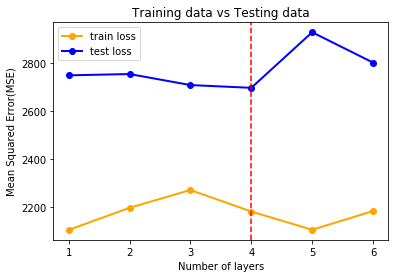

In [69]:
plt.plot(np.arange(1,len(loss)+1),loss, marker='o', color='orange', linewidth=2, label= 'train loss')
plt.plot(np.arange(1,len(loss)+1),test_loss, marker='o', color='blue', linewidth=2, label= 'test loss')
plt.xlabel('Number of layers')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Training data vs Testing data')
plt.axvline(x=4, linestyle='--', color='red')
plt.savefig('Training data vs Testing data.png')            
plt.legend()
plt.show()